### <center> Практическое задание к уроку №1

___

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

___

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [3]:
X.shape

(10, 2)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [12]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

___

**1. Подберите скорость обучения (eta) и количество итераций**

___

In [13]:
X

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  5],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [15]:
n = X.shape[0]

eta = 0.1
n_iter = 500

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
#         print(eta)
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 10        
Learning rate = 0.1        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.8 38.2], MSE = 3047.75
Iteration #0: W_new = [11.8 38.2], MSE = 3047.75
Iteration #10: W_new = [12651.73553914 69617.0969639 ], MSE = 18310954068.05
Iteration #10: W_new = [12651.73553914 69617.0969639 ], MSE = 18310954068.05
Iteration #20: W_new = [ 7732434.81888021 42641607.37852183], MSE = 9128819654907562.0
Iteration #20: W_new = [ 7732434.81888021 42641607.37852183], MSE = 9128819654907562.0
Iteration #30: W_new = [1.06344502e+09 5.86454589e+09], MSE = 2.327920364266843e+20
Iteration #30: W_new = [1.06344502e+09 5.86454589e+09], MSE = 2.327920364266843e+20
Iteration #40: W_new = [3.00127077e+10 1.65510116e+11], MSE = 2.545133529815939e+23
Iteration #40: W_new = [3.00127077e+10 1.65510116e+11], MSE = 2.545133529815939e+23
Iteration #50: W_new = [1.55345341e+11 8.56677968e+11], MSE = 9.572295620500076e+24
Iteration #50: W_new = [1.55345341e+11 8.56677968e+11], MSE = 9.5

___

**2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее**

___

In [16]:
(X.T).shape, len(y)

((2, 10), 10)

In [17]:
n = X.shape[0]

eta = 1e-2
n_iter = 700

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))

    # ИЗМЕНЕНИЯ
#     print(X.shape, (y_pred - y).shape)
#     print(W.shape)
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    #
    if i % 100 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #200: W_new = [38.38986469  5.02247953], MSE = 65.33
Iteration #300: W_new = [42.39314129  4.29654705], MSE = 47.39
Iteration #400: W_new = [43.99463466  4.00614091], MSE = 44.52
Iteration #500: W_new = [44.63530512  3.8899652 ], MSE = 44.06
Iteration #600: W_new = [44.89160255  3.84348962], MSE = 43.98


___

**3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога $\epsilon$.**

___

In [18]:
weights0 = np.array([1, 0.5])
weights1 = np.array([5, 1.9])
np.linalg.norm(weights0 - weights1, ord=2)

4.237924020083418

In [20]:
import matplotlib.pyplot as plt

def plot_vectors(a, b):
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot([a[0]], [a[1]], '*')
    ax.plot([b[0]], [b[1]], '+')
    ax.set_xlabel('intercept')
    ax.set_ylabel('w1')
    return ax

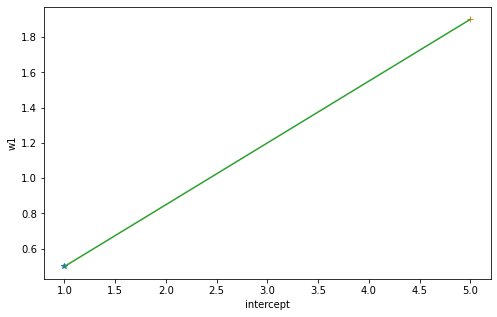

In [21]:
ax = plot_vectors(weights0, weights1)
ax.plot([weights0[0], weights1[0]], [weights0[1], weights1[1]]);

In [22]:
# a**2 + b**2 = c**2
((5-1)**2 + (1.9-0.5)**2)**0.5

4.237924020083418

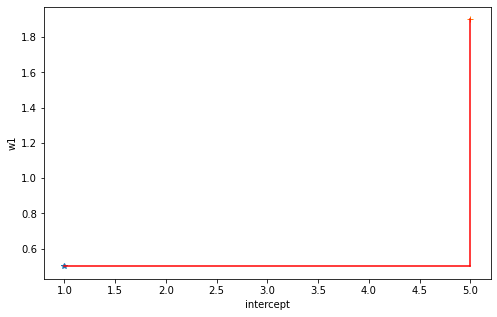

In [23]:
ax = plot_vectors(weights0, weights1)
ax.plot([weights0[0], weights1[0]], [weights0[1], weights0[1]], c='r')
ax.plot([weights1[0], weights1[0]], [weights0[1], weights1[1]], c='r');

In [24]:
np.linalg.norm(weights0 - weights1, ord=1)

5.4

In [ ]:
abs(5-1) + abs(1.9-0.5)